# Plotting


In [45]:
import numpy as np
import pandas as pd
import apyori
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

data_df = pd.read_csv("hoonetulekahjud.csv")
data_df = data_df.fillna('')
data = data_df.values
data_with_months = []
data_copy = data.copy()
for i in data_copy:
    if i[4] == 1:
        i[4] = 'January'
    elif i[4] == 2:
        i[4] = 'February'
    elif i[4] == 3:
        i[4] = 'March'
    elif i[4] == 4:
        i[4] = 'April'
    elif i[4] == 5:
        i[4] = 'May'
    elif i[4] == 6:
        i[4] = 'June'
    elif i[4] == 7:
        i[4] = 'July'
    elif i[4] == 8:
        i[4] = 'August'
    elif i[4] == 9:
        i[4] = 'September'
    elif i[4] == 10:
        i[4] = 'October'
    elif i[4] == 11:
        i[4] = 'November'
    elif i[4] == 12:
        i[4] = 'December'
    data_with_months.append(i)
data_df

,Maakond,Aasta,Hoone liik,Tekkepõhjus,Kuu,Hoonetulekahjud
0,Valga maakond,2014,Mitteeluhooned,!Sisestamata!,3,1
1,Tartu maakond,2014,Mitteeluhooned,!Sisestamata!,3,3
2,Rapla maakond,2014,Mitteeluhooned,!Sisestamata!,3,1
3,Lääne maakond,2014,Mitteeluhooned,!Sisestamata!,3,1
4,Harju maakond,2014,Mitteeluhooned,!Sisestamata!,3,2
...,...,...,...,...,...,...
5660,Ida-Viru maakond,2020,!Sisestamata!,!Sisestamata!,11,1
5661,Ida-Viru maakond,2020,Eluhooned,Lahtise tule kasutamisel,11,1
5662,Harju maakond,2020,!Sisestamata!,!Sisestamata!,11,1
5663,Harju maakond,2020,Eluhooned,!Sisestamata!,11,1


In [46]:
year2014 = []
year2015 = []
year2016 = []
year2017 = []
year2018 = []
year2019 = []
year2020 = []
year2014_month = []
year2015_month = []
year2016_month = []
year2017_month = []
year2018_month = []
year2019_month = []
year2020_month = []
for i in range(len(data)):
    if data[i][1] == 2014:
        year2014.append(data[i])
        year2014_month.append(data_with_months[i])
    elif data[i][1] == 2015:
        year2015.append(data[i])
        year2015_month.append(data_with_months[i])
    elif data[i][1] == 2016:
        year2016.append(data[i])
        year2016_month.append(data_with_months[i])
    elif data[i][1] == 2017:
        year2017.append(data[i])
        year2017_month.append(data_with_months[i])
    elif data[i][1] == 2018:
        year2018.append(data[i])
        year2018_month.append(data_with_months[i])
    elif data[i][1] == 2019:
        year2019.append(data[i])
        year2019_month.append(data_with_months[i])
    elif data[i][1] == 2020:
        year2020.append(data[i])
        year2020_month.append(data_with_months[i])
#print(year2014)
data_by_years = [year2014, year2015, year2016, year2017, year2018, year2019, year2020]

## Building fires by month throughout 2014-2020

In [22]:
def fires_by_months(year):
    array = []
    for i in year:
        for j in range(i[5]):
            array.append(i[4])
    return array
def count_fires_in_months(year):
    k = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    for i in year:
        if i == 'January':
            k[0] += 1
        elif i == 'February':
            k[1] += 1
        elif i == 'March':
            k[2] += 1
        elif i == 'April':
            k[3] += 1
        elif i == 'May':
            k[4] += 1
        elif i == 'June':
            k[5] += 1
        elif i == 'July':
            k[6] += 1
        elif i == 'August':
            k[7] += 1
        elif i == 'September':
            k[8] += 1
        elif i == 'October':
            k[9] += 1
        elif i == 'November':
            k[10] += 1
        elif i == 'December':
            k[11] += 1
    return k
        
print(count_fires_in_months(fires_by_months(year2019_month)))           

[95, 73, 81, 131, 103, 132, 71, 94, 84, 71, 67, 90]


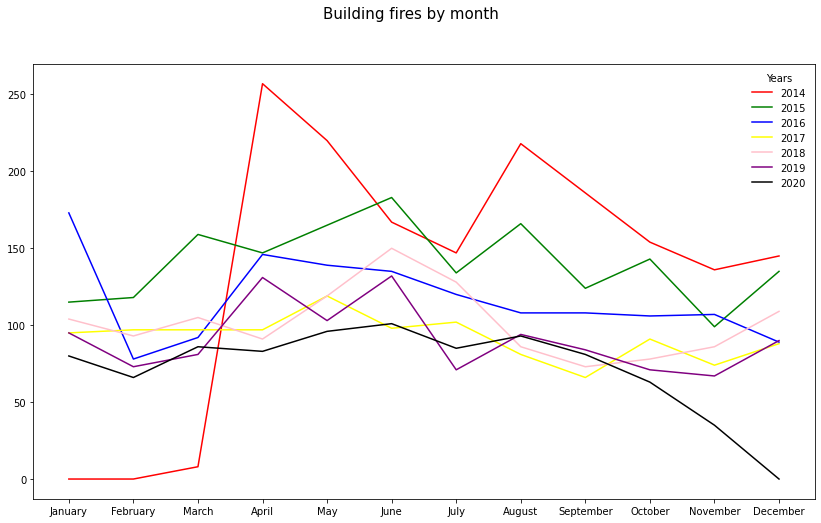

In [23]:
import matplotlib.pyplot as plt

# The data
x = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
y1 = count_fires_in_months(fires_by_months(year2014_month))
y2 = count_fires_in_months(fires_by_months(year2015_month))
y3 = count_fires_in_months(fires_by_months(year2016_month))
y4 = count_fires_in_months(fires_by_months(year2017_month))
y5 = count_fires_in_months(fires_by_months(year2018_month))
y6 = count_fires_in_months(fires_by_months(year2019_month))
y7 = count_fires_in_months(fires_by_months(year2020_month))

# Initialise the figure and axes.
fig, ax = plt.subplots(1, figsize=(14, 8))

# Set the title for the figure
fig.suptitle('Building fires by month', fontsize=15)

# Draw all the lines in the same plot, assigning a label for each one to be
# shown in the legend.
ax.plot(x, y1, color="red", label="2014")
ax.plot(x, y2, color="green", label="2015")
ax.plot(x, y3, color="blue", label="2016")
ax.plot(x, y4, color="yellow", label="2017")
ax.plot(x, y5, color="pink", label="2018")
ax.plot(x, y6, color="purple", label="2019")
ax.plot(x, y7, color="black", label="2020")

# Add a legend, and position it on the lower right (with no box)
plt.legend(loc="upper right", title="Years", frameon=False)

plt.show()


## 15 most common reasons throughout 2014-2020

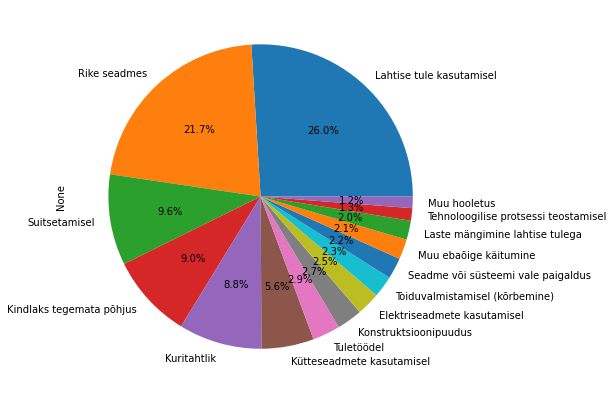

In [32]:
#Cleaning the data, clustering similar reasons
#Only showing the 15 most common reasons, showing more isn't reasonable, 
#because the uncommon ones don't really make a difference in the plot.
def different_causes(data):
    array = []
    for i in data:
        cause = i[3]
        for j in range(i[5]):
            if 'rike' in cause.lower(): 
                array.append('Rike seadmes')
            elif cause == 'Kindlaks tegemata põhjus' or cause == '!Sisestamata!':
                array.append('Kindlaks tegemata põhjus')
            else: 
                array.append(i[3])
    return array
o = pd.Index(different_causes(data))
o.value_counts()[:15].plot(kind='pie', figsize=(7, 7), autopct='%1.1f%%')
plt.show()

## Correlation between month and county

In [20]:
def dataset_with_months_and_counties(data):
    array = []
    for i in data:
        for j in range(i[5]):
            array.append([i[0], i[4]])
    return array
dataframe = pd.DataFrame((dataset_with_months_and_counties(data)), columns=['Maakond', 'Kuu'])
#dataframe['Hoonetulekahjud'] = 0 
#np.c_[np.unique(data_df, return_counts=1)]
dataframe['Hoonetulekahjud']=dataframe.groupby(by=['Maakond', 'Kuu'])['Maakond'].transform('count')
dataframe = dataframe.drop_duplicates()

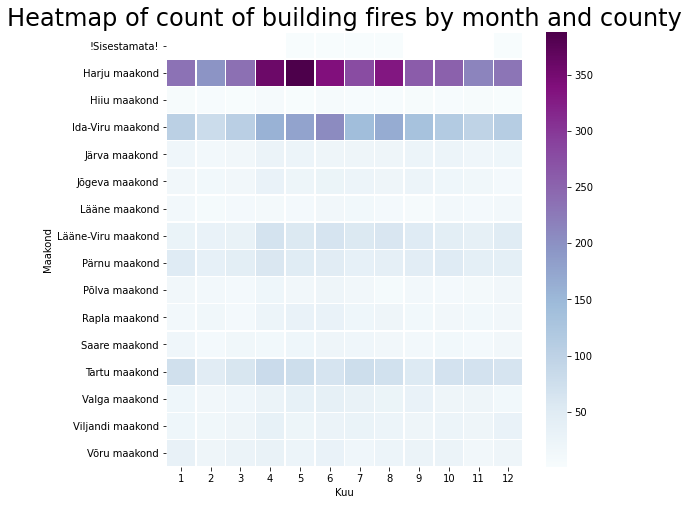

In [69]:
#Pivot the Data to Heatmap Format
fires = dataframe.pivot("Maakond", "Kuu", "Hoonetulekahjud")
#Draw a Heatmap of Fire Counts by Month and Year
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(fires, linewidths=.5, ax=ax, cmap="BuPu")
ax.axes.set_title("Heatmap of count of building fires by month and county", fontsize=24, y=1.01);

## The amount of building fires by year 

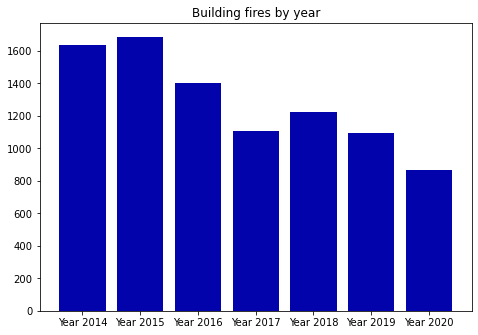

In [36]:
 def fires_in_a_year(year):
    counter = 0
    for i in year:
        counter += int(i[5])
    return counter

import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['Year 2014', 'Year 2015', 'Year 2016', 'Year 2017', 'Year 2018', 'Year 2019', 'Year 2020']
counts = [fires_in_a_year(year2014), fires_in_a_year(year2015), fires_in_a_year(year2016), fires_in_a_year(year2017), fires_in_a_year(year2018), fires_in_a_year(year2019), fires_in_a_year(year2020)] 
ax.bar(langs,counts, color='#0203aa')
ax.set_title('Building fires by year')
plt.show()

## Most common causes by year

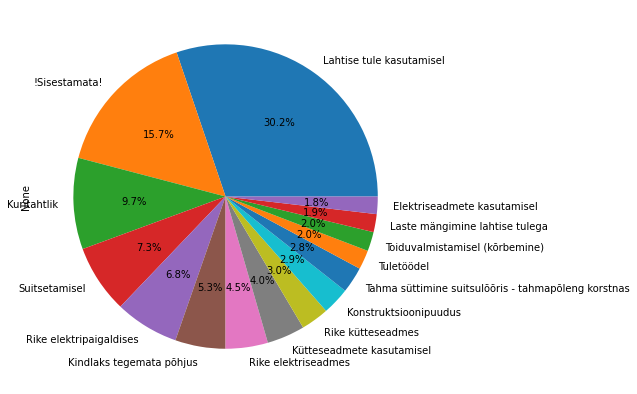

In [62]:
def different_causes(year):
    array = []
    for i in year:
        for j in range(i[5]):
            array.append(i[3])
    return array
a = pd.Index(different_causes(year2014)).value_counts()[:15]
b = pd.Index(different_causes(year2015)).value_counts()[:15]
c = pd.Index(different_causes(year2016)).value_counts()[:15]
d = pd.Index(different_causes(year2017)).value_counts()[:15]
e = pd.Index(different_causes(year2018)).value_counts()[:15]
f = pd.Index(different_causes(year2019)).value_counts()[:15]
g = pd.Index(different_causes(year2020)).value_counts()[:15]

#2014
a.plot(kind='pie', figsize=(7, 7), autopct='%1.1f%%')
plt.show()

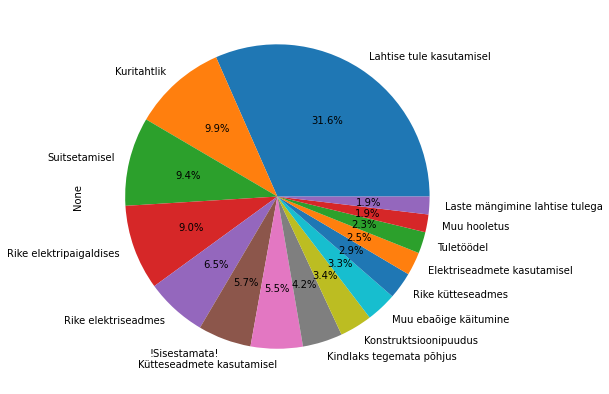

In [63]:
#2015
b.plot(kind='pie', figsize=(7, 7), autopct='%1.1f%%')
plt.show()

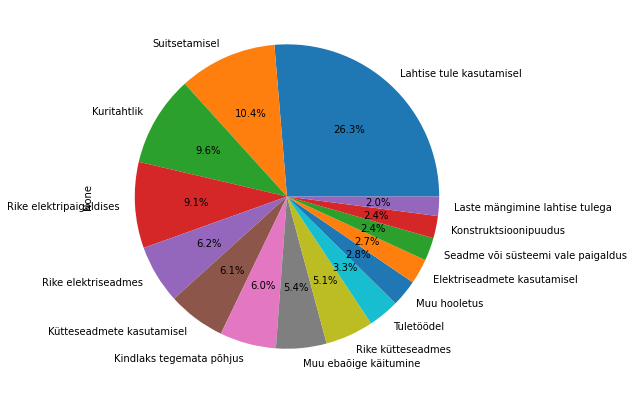

In [64]:
#2016
c.plot(kind='pie', figsize=(7, 7), autopct='%1.1f%%')
plt.show()

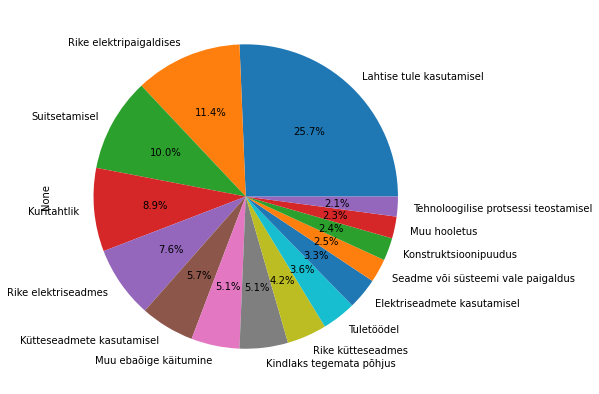

In [65]:
#2017
d.plot(kind='pie', figsize=(7, 7), autopct='%1.1f%%')
plt.show()

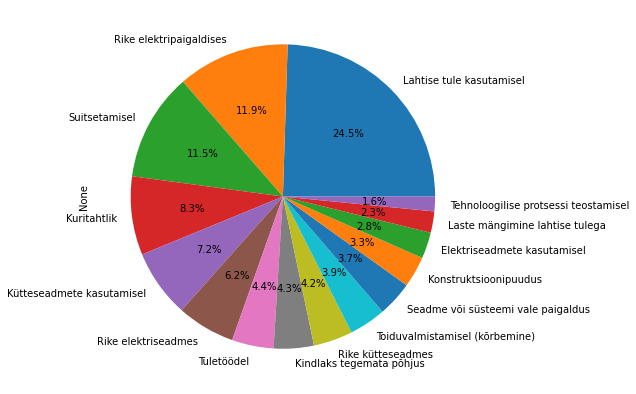

In [66]:
#2018
e.plot(kind='pie', figsize=(7, 7), autopct='%1.1f%%')
plt.show()

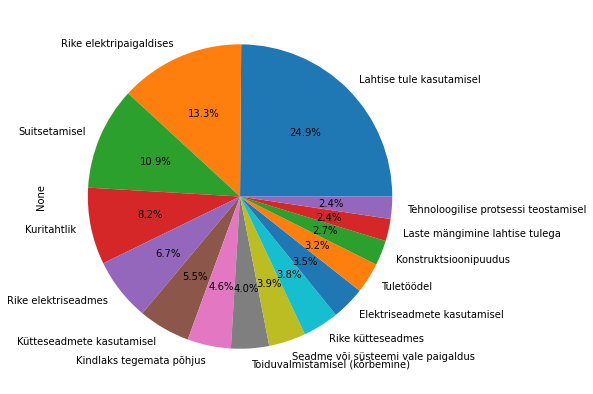

In [67]:
#2019
f.plot(kind='pie', figsize=(7, 7), autopct='%1.1f%%')
plt.show()

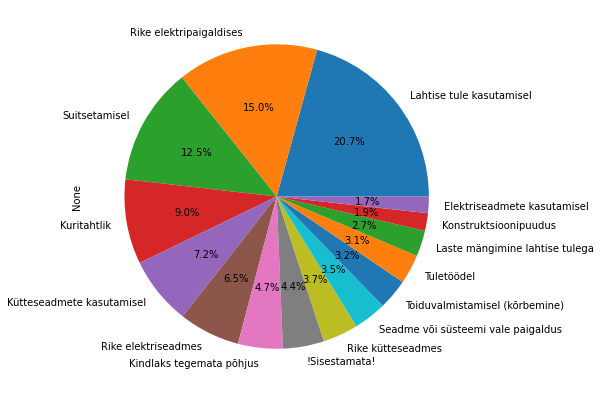

In [68]:
#2020
g.plot(kind='pie', figsize=(7, 7), autopct='%1.1f%%')
plt.show()